In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import MeanAbsoluteError

In [79]:
# Load dataset
df = pd.read_csv('../data/sinais_com_label.csv')
df

,i,si1,si2,si3,si4,si5,g1,classe
0,1,13.592433,12.220855,8.416754,75.921057,21.635259,40.000000,2
1,2,15.775386,13.586879,8.725890,63.813564,19.718734,41.530427,2
2,3,3.649369,1.904802,0.000000,197.210213,19.045471,52.730745,3
3,4,17.264362,13.700638,8.733333,143.636181,17.621141,34.679911,2
4,5,12.705183,9.485389,1.747626,82.636672,12.209535,69.375882,3
...,...,...,...,...,...,...,...,...
1495,1496,17.151411,6.020803,4.774128,6.701052,7.380529,24.494467,1
1496,1497,13.114511,12.500453,8.400144,81.203081,13.630509,65.385011,3
1497,1498,17.976320,6.054430,4.768427,143.261527,21.843486,24.530704,1
1498,1499,12.640997,5.852639,1.707746,184.267283,14.256125,61.062546,3


In [80]:
''' Selection of features and labels (inputs and outputs) '''

# convert df to array
X = df.iloc[:, [3, 4, 5]].values 
Y = df.iloc[:, 6].values  # g1 instead of class

In [81]:
''' Split dataset into training and testing sets '''
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # 80% train, 20% test

In [82]:
''' Data preprocessing: feature scaling and one-hot encoding of labels '''
scalar = StandardScaler() # standardization of features
x_train_scaled = scalar.fit_transform(x_train)  # fit and transform the training data
x_test_scaled = scalar.transform(x_test)

In [83]:
''' Network architecture'''
def build_mlp_regressor_model(input_dim):
    model = Sequential()

    # Hidden Layers
    model.add(Dense(16, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.2)) # dropout layer for regularization
    model.add(Dense(8, activation='relu'))

    # Output Layer for Regression: 1 neuron, linear activation
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='adam',                 
                  loss='mean_squared_error',
                  metrics=['mae'])

    return model

regressor = build_mlp_regressor_model(input_dim=3)

In [84]:
''' Compile the model and train it '''
history = regressor.fit(epochs=50, batch_size=16, validation_split=0.1, x=x_train_scaled, y=y_train)

Epoch 1/50
68/68 [==============================] - 1s 3ms/step - loss: 1940.2866 - mae: 40.7758 - val_loss: 1816.6870 - val_mae: 38.7581
Epoch 2/50
68/68 [==============================] - 0s 2ms/step - loss: 1811.6052 - mae: 39.0749 - val_loss: 1652.4713 - val_mae: 36.3943
Epoch 3/50
68/68 [==============================] - 0s 3ms/step - loss: 1588.6567 - mae: 35.8742 - val_loss: 1371.6465 - val_mae: 31.9413
Epoch 4/50
68/68 [==============================] - 0s 2ms/step - loss: 1242.3816 - mae: 30.6090 - val_loss: 993.3559 - val_mae: 25.9495
Epoch 5/50
68/68 [==============================] - 0s 2ms/step - loss: 856.8752 - mae: 24.4131 - val_loss: 639.8055 - val_mae: 19.6545
Epoch 6/50
68/68 [==============================] - 0s 1ms/step - loss: 561.3415 - mae: 19.2587 - val_loss: 449.0062 - val_mae: 17.0176
Epoch 7/50
68/68 [==============================] - 0s 1ms/step - loss: 412.5396 - mae: 16.2344 - val_loss: 391.7811 - val_mae: 16.0404
Epoch 8/50
68/68 [=======================

In [89]:
''' Evaluate the model on the test set '''
loss_R, mae_R = regressor.evaluate(
    x_test_scaled, 
    y_test,    
    verbose=0
)

print(f"Mean Squared Error (MSE): {loss_R:.4f}")
print(f"Mean Absolute Error (MAE): {mae_R:.4f}")

Mean Squared Error (MSE): 154.4795
Mean Absolute Error (MAE): 10.0137


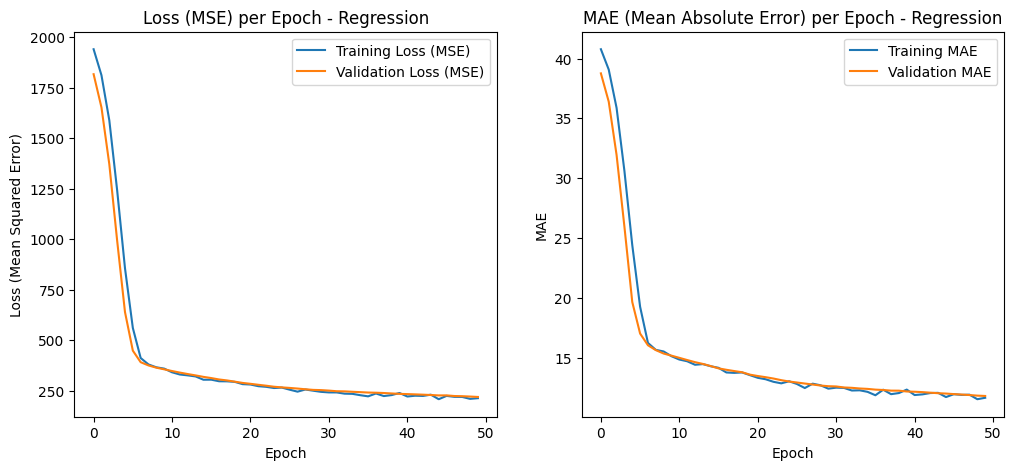

In [90]:
# 1. Graph of the Loss Function (Loss - MSE)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Loss (MSE) per Epoch - Regression')
plt.xlabel('Epoch')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()

# 2. Graph of metric MAE (Mean Absolute Error)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE (Mean Absolute Error) per Epoch - Regression')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

10/10 [==============================] - 0s 778us/step


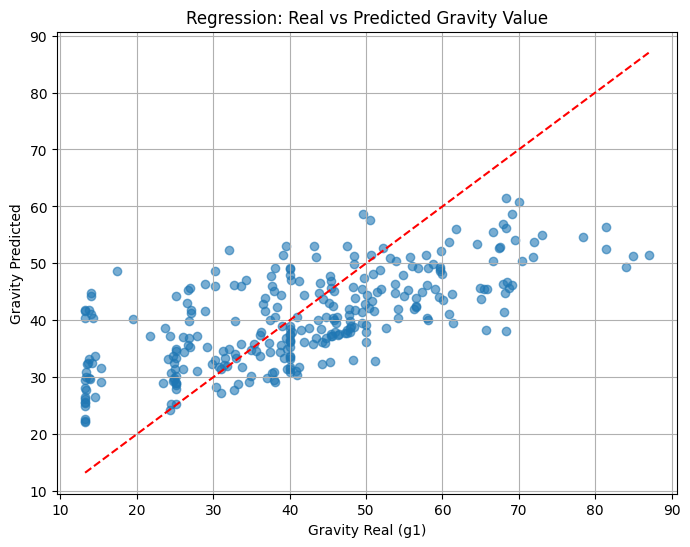

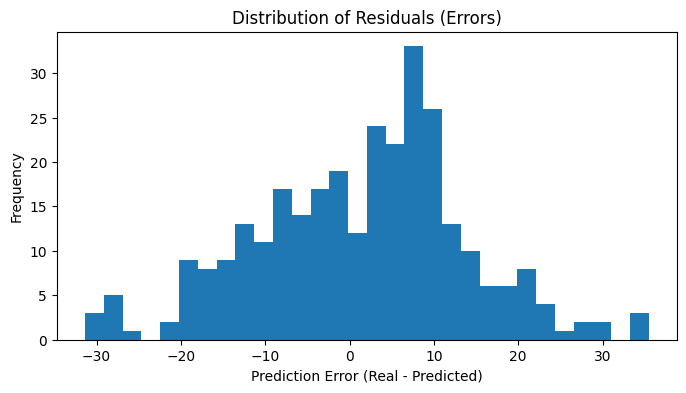

In [91]:
# 1. Generate Predictions
previsoes_g1 = regressor.predict(x_test_scaled).flatten()

# 2. View Real vs Predicted Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, previsoes_g1, alpha=0.6) # Y real vs Y predito
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Linha ideal y=x
plt.title('Regression: Real vs Predicted Gravity Value')
plt.xlabel('Gravity Real (g1)')
plt.ylabel('Gravity Predicted')
plt.grid(True)
plt.show()

# 3. Residual Analysis
# Residuals = Error between the real and predicted
residuos = y_test - previsoes_g1
plt.figure(figsize=(8, 4))
plt.hist(residuos, bins=30)
plt.title('Distribution of Residuals (Errors)')
plt.xlabel('Prediction Error (Real - Predicted)')
plt.ylabel('Frequency')
plt.show()